In [ ]:
#importing the dependencies
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape,LSTM, Bidirectional
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.optimizers import Adam

#loading, shuffling and splitting the dataset
train_data,validation_data,test_data = tfds.load('colorectal_histology', split=['train[:70%]','train[70%:90%]','train[90%:100%]'], shuffle_files=True)

#function to preprocess the data
def preprocess(data):
    #loading the image
    image = data["image"]
    #casting this image tensor as a tensor of float datatype
    image = tf.cast(image, tf.float32)
    #normalizing its values by dividing them by 255
    image = image/255
    #converting the label into one-hot vector
    label = data["label"]
    label = tf.one_hot(label, depth=8)
    return image, label

#preprocessing the training, testing and validation data
train_data = train_data.map(preprocess).batch(batch_size=32)
validation_data = validation_data.map(preprocess).batch(batch_size=len(validation_data))
test_data = test_data.map(preprocess).batch(batch_size=len(test_data))

#function to plot the training curve
def plotTrainingCurve(history,modelName):
    #accuracy vs epoch graph
    f = plt.figure(figsize=(20,6))
    ax = f.add_subplot(121)
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    ax.set_title('model accuracy')
    ax.set(xlabel='epoch', ylabel='accuracy')
    ax.legend(['train', 'test'], loc='upper left')
    #loss vs epoch graph
    ax2 = f.add_subplot(122)
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train', 'test'], loc='upper left')
    plt.savefig("trainingCurve"+modelName+".png", dpi=1000)

#assigning some of the training parameters
image_dimensions=(150, 150, 3)
no_of_epochs=50
no_of_classes=8


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/colorectal_histology/2.0.0.incompleteF7ORDC/colorectal_histology-train.tfr…

Dataset colorectal_histology downloaded and prepared to /root/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


110/110 [==============================] - 9s 74ms/step - loss: 1.7935 - accuracy: 0.2409 - val_loss: 1.6933 - val_accuracy: 0.2320
Epoch 2/50
110/110 [==============================] - 7s 64ms/step - loss: 1.6050 - accuracy: 0.2871 - val_loss: 1.5557 - val_accuracy: 0.2920
Epoch 3/50
110/110 [==============================] - 7s 64ms/step - loss: 1.5104 - accuracy: 0.3226 - val_loss: 1.4726 - val_accuracy: 0.3550
Epoch 4/50
110/110 [==============================] - 7s 65ms/step - loss: 1.4450 - accuracy: 0.3494 - val_loss: 1.4737 - val_accuracy: 0.3910
Epoch 5/50
110/110 [==============================] - 7s 64ms/step - loss: 1.3939 - accuracy: 0.3886 - val_loss: 1.4026 - val_accuracy: 0.4220
Epoch 6/50
110/110 [==============================] - 7s 64ms/step - loss: 1.3462 - accuracy: 0.4217 - val_loss: 1.4159 - val_accuracy: 0.4050
Epoch 7/50
110/110 [==============================] - 7s 64ms/step - loss: 1.3082 - accuracy: 0.4486 - val_loss: 1.3787 - val_accuracy: 0.4490
Epoch 8/50

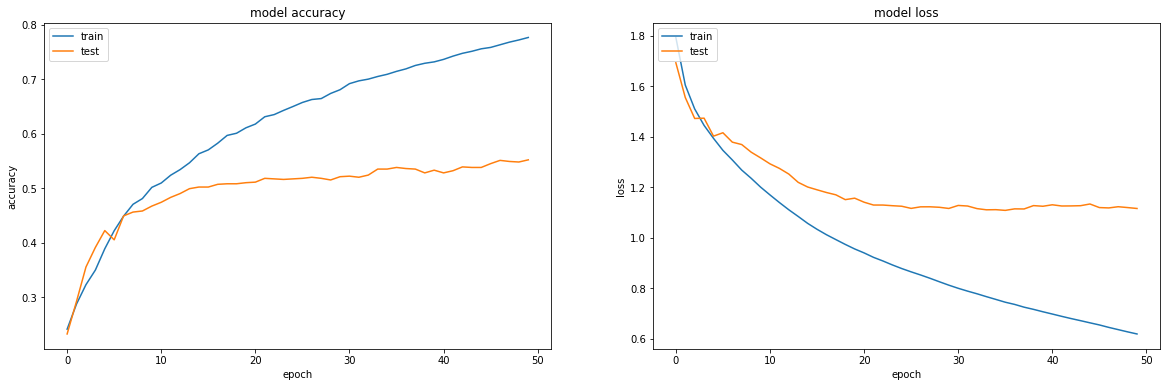

In [ ]:
#creating and training the DNN model

def get_DNN_model(image_dimensions,no_of_classes):
    #declaring the model
    model = Sequential()
    #declaring dense layers
    model.add(Flatten(input_shape=image_dimensions))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(no_of_classes, activation='softmax'))
    #compiling the model
    model.compile(optimizer=Adam(lr=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])
    #returning the model
    return model

#training the DNN model
DNN_model=get_DNN_model(image_dimensions,no_of_classes)
DNN_model_history=DNN_model.fit(train_data, epochs=no_of_epochs,validation_data=(validation_data))

#plotting the training curve of the DNN model
plotTrainingCurve(DNN_model_history,"DNN")

#evaluating the performance of the DNN model on test data
test_loss,test_accuracy=DNN_model.evaluate(test_data)
print("Test Loss of DNN model:", test_loss)
print("Test Accuracy of DNN model:", test_accuracy)

Epoch 1/50
110/110 [==============================] - 72s 644ms/step - loss: 1.8964 - accuracy: 0.2586 - val_loss: 1.6106 - val_accuracy: 0.3650
Epoch 2/50
110/110 [==============================] - 70s 632ms/step - loss: 1.4990 - accuracy: 0.3654 - val_loss: 1.3831 - val_accuracy: 0.4030
Epoch 3/50
110/110 [==============================] - 70s 635ms/step - loss: 1.3111 - accuracy: 0.4683 - val_loss: 1.1612 - val_accuracy: 0.5000
Epoch 4/50
110/110 [==============================] - 70s 633ms/step - loss: 1.0535 - accuracy: 0.5597 - val_loss: 0.9593 - val_accuracy: 0.6130
Epoch 5/50
110/110 [==============================] - 70s 633ms/step - loss: 0.9289 - accuracy: 0.6077 - val_loss: 0.8751 - val_accuracy: 0.6580
Epoch 6/50
110/110 [==============================] - 70s 632ms/step - loss: 0.8750 - accuracy: 0.6289 - val_loss: 0.8401 - val_accuracy: 0.6680
Epoch 7/50
110/110 [==============================] - 70s 631ms/step - loss: 0.8422 - accuracy: 0.6471 - val_loss: 0.8062 - val_ac

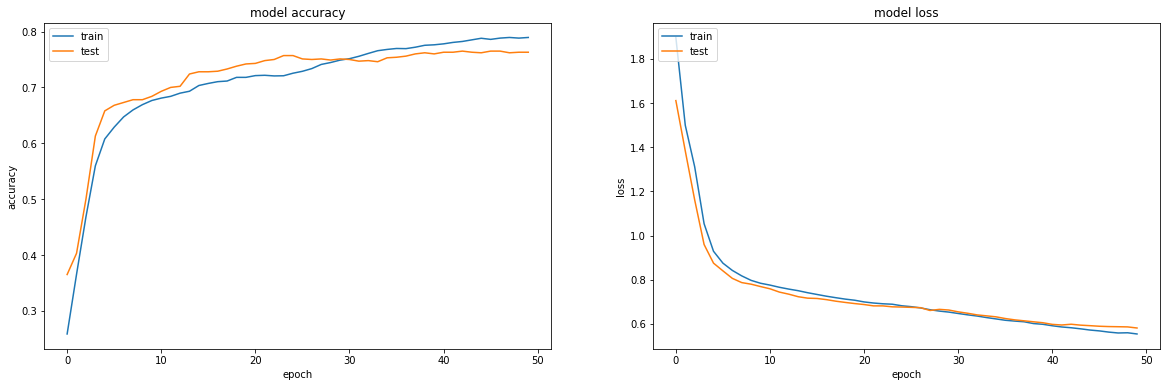

In [ ]:
#creating and training the CNN model

def get_CNN_model(image_dimensions,no_of_classes):
    #declaring the model
    model = Sequential()
    #adding conv2d and maxpooling layers on top of the simple DNN
    model.add(Conv2D(32, (4, 4), activation='relu', input_shape=image_dimensions))
    model.add(MaxPooling2D((4, 4)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(32,(2, 2), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16,(2, 2), activation='relu'))
    model.add(Conv2D(16,(2, 2), activation='relu'))
    #flattening the output of the convolution layers
    model.add(Flatten())
    #dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(no_of_classes, activation='softmax'))
    #compiling the model
    model.compile(optimizer=Adam(lr=0.00019), loss='categorical_crossentropy', metrics=['accuracy'])
    #returning the model
    return model

#training the CNN model
CNN_model=get_CNN_model(image_dimensions,no_of_classes)
CNN_model_history=CNN_model.fit(train_data, epochs=no_of_epochs,validation_data=(validation_data))

#plotting the training curve of the DNN model
plotTrainingCurve(CNN_model_history,"CNN")

#evaluating the performance of the CNN model on test data
test_loss,test_accuracy=CNN_model.evaluate(test_data)
print("Test Loss of CNN model:", test_loss)
print("Test Accuracy of CNN model:", test_accuracy)

Epoch 1/50
110/110 [==============================] - 74s 631ms/step - loss: 1.9068 - accuracy: 0.2491 - val_loss: 1.6381 - val_accuracy: 0.3430
Epoch 2/50
110/110 [==============================] - 70s 632ms/step - loss: 1.4672 - accuracy: 0.4431 - val_loss: 1.2221 - val_accuracy: 0.5350
Epoch 3/50
110/110 [==============================] - 70s 633ms/step - loss: 1.1284 - accuracy: 0.5517 - val_loss: 1.0392 - val_accuracy: 0.5870
Epoch 4/50
110/110 [==============================] - 69s 631ms/step - loss: 1.0439 - accuracy: 0.5743 - val_loss: 0.9765 - val_accuracy: 0.5960
Epoch 5/50
110/110 [==============================] - 70s 633ms/step - loss: 0.9856 - accuracy: 0.5949 - val_loss: 0.9389 - val_accuracy: 0.6120
Epoch 6/50
110/110 [==============================] - 69s 629ms/step - loss: 0.9408 - accuracy: 0.6183 - val_loss: 0.9280 - val_accuracy: 0.6240
Epoch 7/50
110/110 [==============================] - 69s 629ms/step - loss: 0.9121 - accuracy: 0.6363 - val_loss: 0.9280 - val_ac

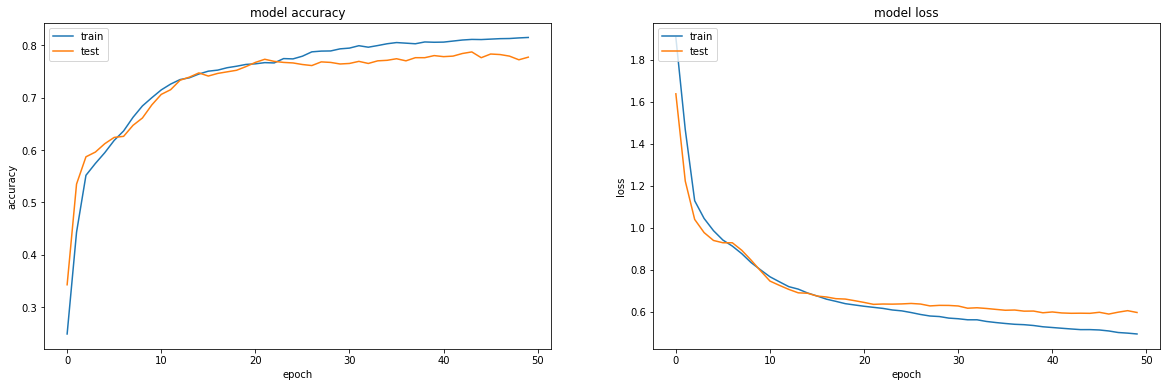

In [ ]:
#creating and training a hybrid CNN-LSTM model

def get_CNN_LSTM_model(image_dimensions,no_of_classes):
    #declaring the model
    model = Sequential()
    #adding conv2d and maxpooling layers
    model.add(Conv2D(32, (4, 4), activation='relu', input_shape=image_dimensions))
    model.add(MaxPooling2D((4, 4)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(32,(2, 2), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16,(2, 2), activation='relu'))
    model.add(Conv2D(16,(2, 2), activation='relu'))
    #converting the features output into a sequence for the LSTM layer
    model.add(Flatten())
    model.add(Reshape((1,144)))
    #adding a bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128,activation='tanh')))
    #dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(no_of_classes, activation='softmax'))
    #compiling the model
    model.compile(optimizer=Adam(lr=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
    #returning the model
    return model

#training the CNN_LSTM model
CNN_LSTM_model=get_CNN_LSTM_model(image_dimensions,no_of_classes)
CNN_LSTM_model_history=CNN_LSTM_model.fit(train_data, epochs=no_of_epochs,validation_data=(validation_data))

#evaluating the performance of the CNN_LSTM model on test data
test_loss,test_accuracy=CNN_LSTM_model.evaluate(test_data)
print("Test Loss of CNN+LSTM model:", test_loss)
print("Test Accuracy of CNN+LSTM model:", test_accuracy)

#plotting the training curve of the CNN_LSTM model
plotTrainingCurve(CNN_LSTM_model_history,"CNN_LSTM")


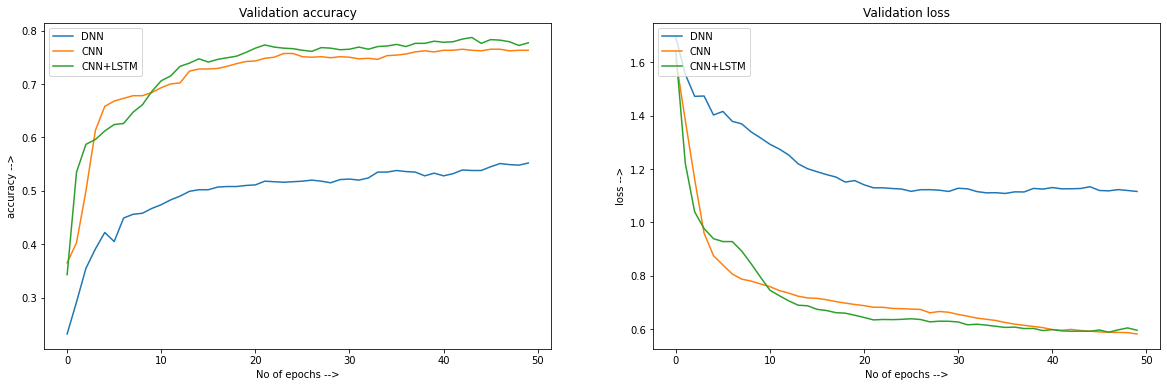

In [ ]:
#function to plot the comparative training validation graphs of the three models
def plotComparativeTrainingValidationCurve(DNN_model_history,CNN_model_history,CNN_LSTM_model_history):
    f = plt.figure(figsize=(20,6))
    #plotting the validation accuracies
    ax = f.add_subplot(121)
    ax.plot(DNN_model_history.history['val_accuracy'])
    ax.plot(CNN_model_history.history['val_accuracy'])
    ax.plot(CNN_LSTM_model_history.history['val_accuracy'])
    ax.set_title('Validation accuracy')
    ax.set(xlabel='No of epochs -->', ylabel='accuracy -->')
    ax.legend(['DNN','CNN', 'CNN+LSTM'], loc='upper left')
    #plotting the validation losses
    ax2 = f.add_subplot(122)
    ax2.plot(DNN_model_history.history['val_loss'])
    ax2.plot(CNN_model_history.history['val_loss'])
    ax2.plot(CNN_LSTM_model_history.history['val_loss'])
    ax2.set_title('Validation loss')
    ax2.set(xlabel='No of epochs -->', ylabel='loss -->')
    ax2.legend(['DNN','CNN', 'CNN+LSTM'], loc='upper left')
    #saving the plot
    plt.savefig("ComparativeTrainingValidationCurve.png", dpi=1000)

#plotting the comparative training validation graphs of the three models
plotComparativeTrainingValidationCurve(DNN_model_history,CNN_model_history,CNN_LSTM_model_history)
